# Transferring Topo stuff to python

In [17]:
# Import packages 
import os
import sys

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.tri as tri
import matplotlib.colors as colors

from scipy.io import FortranFile

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import importlib
import glob
import copy

import Plots as Po

importlib.reload(Po)

#sys.path.append('../Plotting/')
#   Now you can imprt modules in ../Plotting
#import xyp_plot as xyp
#import ana as a


<module 'Plots' from '/project/amp/juliob/myPythonTools/TopoAna/Plots.py'>

In [2]:
host=os.getenv('HOST')
host

'tungsten.cgd.ucar.edu'

## Set some paths and directories

In [3]:
TopoRoot = '/project/amp/juliob/Topo-generate-devel/Topo/Topo.git/'
Case = 'ne30pg3_co60_fi0_bsln'
Case = 'c540_CONUS_04'


In [4]:
# RemapFile = 'remap_nc0540_Nsw008_Nrs000_Co012_Fi000_vX_20230106_1205.dat'
# FileN=TopoRoot +'/cases/'+ Case + '/output/'+RemapFile

# Do a file search in output directory
# Pick last (most recent) file
foo=glob.glob( TopoRoot +'/cases/'+ Case + '/fort.333')
FileN = foo[-1]

f=FortranFile( FileN, 'r')
#idims=f.read_record( '<i4' )

nc=3000 #idims[0]
refoo=f.read_record( '<f8'   ).reshape( 6,nc,nc)


In [5]:
oo=np.where( refoo.flatten()<1.)
print(len(oo[0]),len(refoo.flatten()), len(oo[0])/len(refoo.flatten()) )
print("Min amd Max refinement in each panel " )
for ipan in np.arange(6):
    print( ipan, np.min(refoo[ipan,:,:] ), np.max(refoo[ipan,:,:] )  )

0 54000000 0.0
Min amd Max refinement in each panel 
0 1.0 4.0
1 1.0 2.0
2 1.0 5.0
3 2.0 8.0
4 1.0 3.0
5 1.0 8.0


In [6]:
yoog=copy.deepcopy(refoo)
yoog[:,:,:]=0.
yoog=np.where( refoo < .95 , 1., 0. )

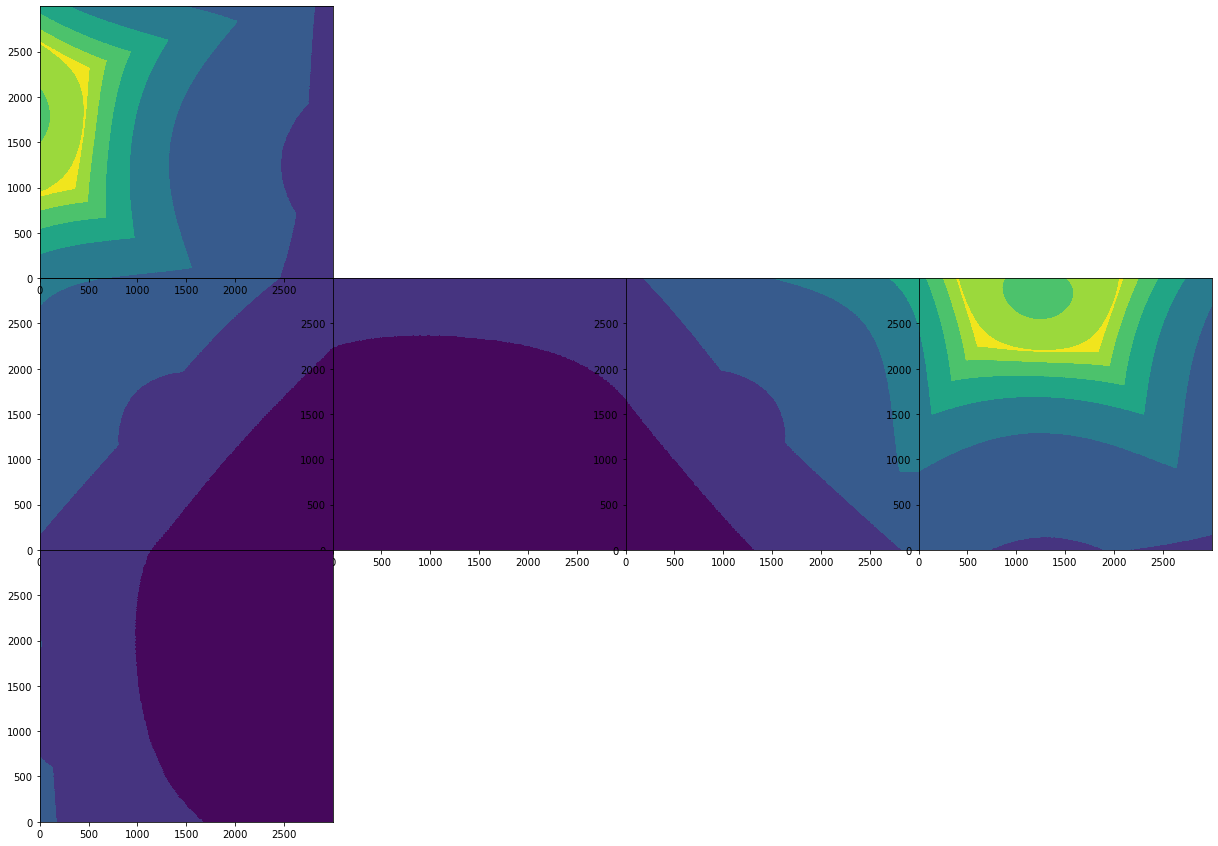

In [7]:
Po.sixpanel(aa=refoo, clev=np.linspace(1,8,num=24) )

In [8]:
gooy=np.where(refoo<.98)
print(np.shape(gooy[0]))

(0,)


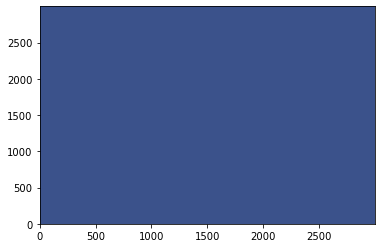

In [9]:
plt.contourf(yoog[5,:,:])

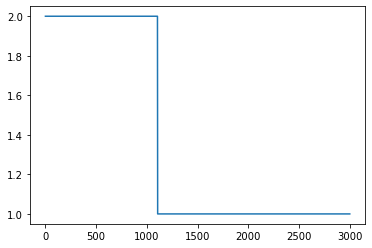

In [10]:
#plt.plot(refoo.flatten(),'.')
clev=np.linspace(-.1,1,num=2)
#plt.contourf( refoo[4,:,:],levels=clev,cmap='gist_ncar')
#plt.colorbar()
plt.plot( refoo[4,1000,:])

In [11]:
foo=glob.glob( TopoRoot +'/cases/'+ Case + '/output/topo*.nc')
FileN = foo[-1]
print(FileN)
topo=xr.open_dataset( FileN )
print(list(topo.variables))
print(topo.attrs)
raw=topo['terr_dev']+topo['terr_sm']
Loo = np.size(raw)
nc=int(np.sqrt( Loo/6 ))
print(int(nc))
raw=np.reshape( raw.values , (6,nc,nc) )
dev=np.reshape( topo['terr_dev'].values , (6,nc,nc) )
smoo=np.reshape( topo['terr_sm'].values , (6,nc,nc) )
tlats=np.reshape( topo['lat'].values , (6,nc,nc) )
tlons=np.reshape( topo['lon'].values , (6,nc,nc) )


/project/amp/juliob/Topo-generate-devel/Topo/Topo.git//cases/c540_CONUS_04/output/topo_smooth_gmted2010_modis_bedmachine_nc3000_Co030_geos_c540_CONUS.nc
['terr_sm', 'terr_dev', 'landfrac', 'rr_fac', 'lat', 'lon']
{'data_summary': 'Smoothed topo data for quicker generation of topography data', 'creation_date': '20230410', 'cesm_contact': 'Peter Hjort Lauritzen and Julio Bacmeister', 'data_source': 'https://github.com/NCAR/Topo.git', 'data_script': './cube_to_target --grid_descriptor_file /project/amp/juliob/Topo-generate-devel/Topo/inputdata/grid-descriptor-file/PE540x3240-Refinement-CF.nc --intermediate_cs_name /project/amp/juliob/Topo-generate-devel/Topo/inputdata/cubed-sphere-topo/gmted2010_modis_bedmachine-ncube3000-220518.nc --output_grid geos_c540_CONUS --smoothing_scale 50.000000000000000 --fine_radius 0 --name_email_of_creator juliob@ucar.edu --output_data_directory output/ --development_diags --rrfac_max 8 --rrfac_manipulation', 'data_reference': 'Lauritzen, P. H. et al.: NCAR 

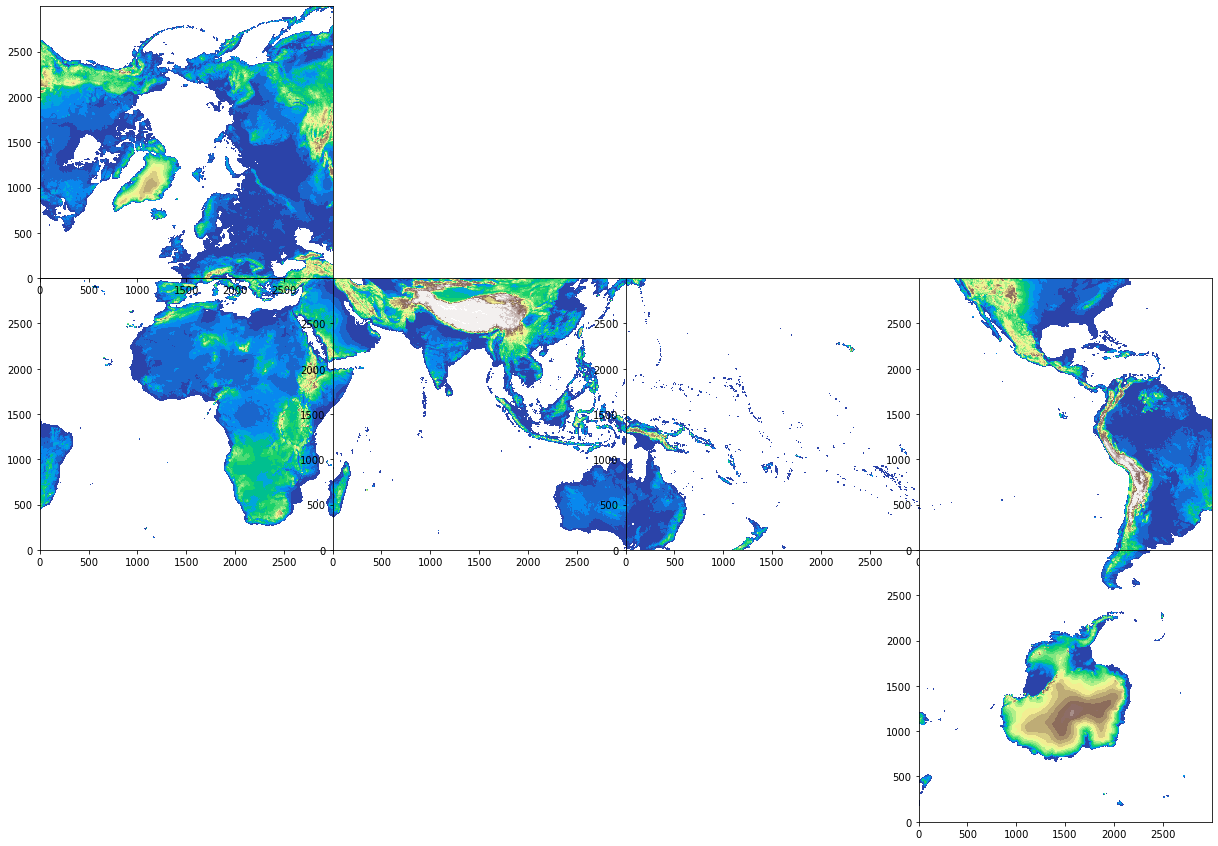

In [19]:
Po.sixpanel(aa=raw, clev=np.linspace(0,5000.,num=21) ,goofy=True , cmap='terrain' )
#Po.sixpanel(aa=yoog, clev=np.linspace(-1,2,num=21) )

## Read in 'remap' file. Currently an unformatted fortran file

In [20]:
# RemapFile = 'remap_nc0540_Nsw008_Nrs000_Co012_Fi000_vX_20230106_1205.dat'
# FileN=TopoRoot +'/cases/'+ Case + '/output/'+RemapFile

# Do a file search in output directory
# Pick last (most recent) file
foo=glob.glob( TopoRoot +'/cases/'+ Case + '/output/remap*dat')
FileN = foo[-1]

f=FortranFile( FileN, 'r')
idims=f.read_record( '<i4' )

nc=idims[0]

uniqi=f.read_record( '<f8'   ).reshape( 6,nc,nc)
aniso=f.read_record( '<f8'   ).reshape( 6,nc,nc)
anglx=f.read_record( '<f8'   ).reshape( 6,nc,nc)
mxdis=f.read_record( '<f8'   ).reshape( 6,nc,nc)
hwdth=f.read_record( '<f8'   ).reshape( 6,nc,nc)
clngt=f.read_record( '<f8'   ).reshape( 6,nc,nc)
block=f.read_record( '<f8'   ).reshape( 6,nc,nc)
profi=f.read_record( '<f8'   ).reshape( 6,nc,nc)
nodes=f.read_record( '<f8'   ).reshape( 6,nc,nc)
wedge=f.read_record( '<f8'   ).reshape( 6,nc,nc)
nodos=f.read_record( '<f8'   ).reshape( 6,nc,nc)
wedgo=f.read_record( '<f8'   ).reshape( 6,nc,nc)



In [ ]:
print(np.shape(foo))
print(foo[-1])

In [ ]:
#plt.figure(figsize=(20, 20))
fig,ax = plt.subplots(2,figsize=(15,30))
ax[0].contourf( block[3,:,:])
#ax[0].contour( tlons[4,:,:], colors='white',clevels=51)
ax[0].set_aspect('equal') #,'box')
ax[1].contourf( block[4,:,:])
ax[1].set_aspect('equal') #,'box')

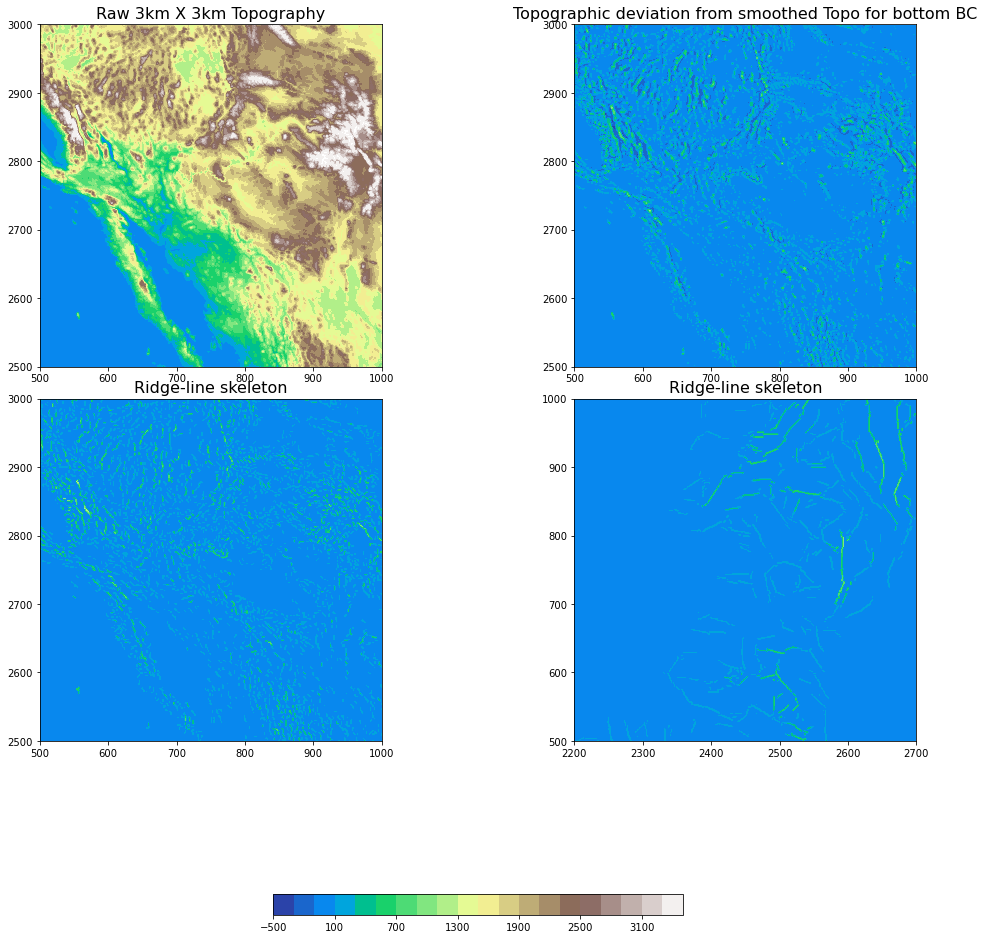

In [21]:
ipanel=3

xlim=(500,1000) #1000
ylim=(2500,3000)
#xlim=(0,3000)
#ylim=(0,3000)

clevels=np.linspace(-500.,3500.,num=21)
cmap=plt.cm.terrain
fig,ax = plt.subplots(2,2,figsize=(15,15) ,squeeze=False ) # , sharex=True)

titlesize=16


i,j=0,1
cf=ax[i,j].contourf( dev[ipanel,:,:],cmap=cmap,levels=clevels)
#cf=ax[0,0].contour( mxdis[ipanel,:,:],colors='black',levels=clevels)
#cf=ax[0,0].contourf( raw[ipanel,:,:],cmap=cmap,levels=clevels) #,alpha=.99)
#ax[0].contour( tlons[4,:,:], colors='white',clevels=51)
#plt.colorbar(cf,ax=ax[0,0],location='bottom')
ax[i,j].set_aspect('equal') #,'box')
ax[i,j].set_xlim( xlim )
ax[i,j].set_ylim( ylim )
ax[i,j].set_title( "Topographic deviation from smoothed Topo for bottom BC" , fontsize=titlesize )

#ax[1].contourf( block[4,:,:])
#ax[1].set_aspect('equal') #,'box')


i,j=1,1
"""
cf=ax[i,j].contourf( wedgo[ipanel,:,:],cmap=cmap,levels=clevels)
ax[i,j].set_aspect('equal') #,'box')
ax[i,j].set_xlim( xlim )
ax[i,j].set_ylim( ylim )
ax[i,j].set_title( "Volume filling reconstruction from ridge parameters" , fontsize=titlesize )
"""
cf=ax[i,j].contourf( mxdis[ipanel,:,:],cmap=cmap,levels=clevels)
ax[i,j].set_aspect('equal') #,'box')
#ax[i,j].set_xlim( (2200,2700) )
#ax[i,j].set_ylim( (500,1000) )
ax[i,j].set_ylim( (0,1000) )
ax[i,j].set_xlim( left=0,right=3000 , auto=True)
ax[i,j].set_title( "Ridge-line skeleton" , fontsize=titlesize )


i,j=0,0
cf=ax[i,j].contourf( raw[ipanel,:,:],cmap=cmap,levels=clevels)
ax[i,j].set_aspect('equal') #,'box')
ax[i,j].set_xlim( xlim )
ax[i,j].set_ylim( ylim )
ax[i,j].set_title( "Raw 3km X 3km Topography" , fontsize=titlesize )

i,j=1,0
cf=ax[i,j].contourf( mxdis[ipanel,:,:],cmap=cmap,levels=clevels)
ax[i,j].set_xlim( xlim )
ax[i,j].set_ylim( ylim )
ax[i,j].set_aspect('equal') #,'box')
ax[i,j].set_title( "Ridge-line skeleton" , fontsize=titlesize )

i,j=1,1
ipanel=0
cf=ax[i,j].contourf( mxdis[ipanel,:,:],cmap=cmap,levels=clevels)
ax[i,j].set_xlim( (2200,2700) )
ax[i,j].set_ylim( (500,1000) )
ax[i,j].set_aspect('equal') #,'box')
#ax[i,j].set_ylim( (0,1000) )
#ax[i,j].set_xlim( left=0,right=3000 , auto=True)
ax[i,j].set_title( "Ridge-line skeleton" , fontsize=titlesize )


plt.tight_layout()

plt.colorbar(cf,ax=ax,location='bottom',shrink=.4)



## Top-left shows raw 3km X 3km topography. For topographic BC generation, a smoothing scale is chosen first.  For 1 degree grids topography is typically smoothed over a ~180km radius. Top-right shows "deviation" of raw topography from topography smoothed with a 180km radius. Bottom-left shows "skeleton" derived by analyzing varaiances in rotated boxes with 180/sqrt(2) sides. Ridge-orientation is defined as the rotation angle with maximum variance of ridge profile (Y-average of topography, where Y is the coordinate along the potential ridge line).  Bottom-left shows a volume-filling reconstruction of the topography based on ridge parameters - heght, orientation, width, length

In [ ]:
ipanel=3

xlim=(300,1900)
ylim=(1400,3000)

clevels=np.linspace(-500.,3500.,num=21)
cmap=plt.cm.terrain
fig,ax = plt.subplots(1,1,figsize=(15,15) ,squeeze=False , sharex=True)

titlesize=16


i,j=0,0
cf=ax[i,j].contour( raw[ipanel,:,:],colors='white',levels=[1,10000])
cf=ax[i,j].contour( mxdis[ipanel,:,:],colors='black',levels=clevels)
cf=ax[i,j].contourf( dev[ipanel,:,:],cmap=cmap,levels=clevels)
#cf=ax[0,0].contourf( raw[ipanel,:,:],cmap=cmap,levels=clevels) #,alpha=.99)
#ax[0].contour( tlons[4,:,:], colors='white',clevels=51)
#plt.colorbar(cf,ax=ax[0,0],location='bottom')
ax[i,j].set_aspect('equal') #,'box')
ax[i,j].set_xlim( xlim )
ax[i,j].set_ylim( ylim )
ax[i,j].set_title( "Topographic deviation with skeleton over-plotted" , fontsize=titlesize )

ax[i,j].annotate("Nevada",
            xy=(700, 2900), xycoords='data',
            xytext=(1200, 2700), textcoords='data',color='white',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",color='white'),
            )
#ax[1].contourf( block[4,:,:])
#ax[1].set_aspect('equal') #,'box')
plt.colorbar(cf,ax=ax,location='right',shrink=.4)

## Ridge skeleton overlaid on topographic deviation. Notice that deviation is high-pass and multi-scale, in other words, all scales smaller than the smoothing scale are retained. But, ridge algorithm tends to pick out features with scales on the order of the smoothng radius.The algorithm can pick out smaller scales only where no feature with scale~smoothing radius is present, e.g., Nevada